# Predict a biological response of molecules from their chemical properties

The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

We have shared the data in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.

**Source:** https://www.kaggle.com/c/bioresponse

## A few things to note
- Training and test datasets are: https://www.kaggle.com/c/bioresponse/data 
- If you don't want to log in, you can get the data from: https://goo.gl/YKS2Fq
- The benchmark codes provided in the competitions: https://github.com/benhamner/BioResponse
- The tutorial for this competition: http://blog.kaggle.com/?p=2870
- The best submission for the problem: https://github.com/emanuele/kaggle_pbr

## Model Evaluation
For evaluating the accuracy of the model for this competition, kaggle has used **Logarithmic Loss**: https://www.kaggle.com/wiki/LogarithmicLoss

- An intuitive explanation for log loss: http://www.r-bloggers.com/making-sense-of-logarithmic-loss/

**Other evaluation metrics:** 

## Codes

In [1]:
import numpy as np
import scipy as sp
import pylab as pl
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
# Function to load training data and perform train and target split
# 'target' is the dependent or criterion variable
# 'train' is the training dataset
def loadData(pathToData):
    # read file into dataset
    dataset = genfromtxt(open(pathToData, 'r'), delimiter=',', dtype='f8')[1:] # [1:] skipping header

    # get training set and target (dependent) variable set
    train = np.array([x[1:] for x in dataset])
    target = np.array([x[0] for x in dataset])
        
    return train, target 

In [3]:
# Log loss function - kaggle implementation
def llfun(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

### Load data

In [4]:
train, target = loadData('Data/train.csv')

### Perform PCA decomposition

In [5]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(train)
X = pca.transform(train)

### Plot first and second pc(s)

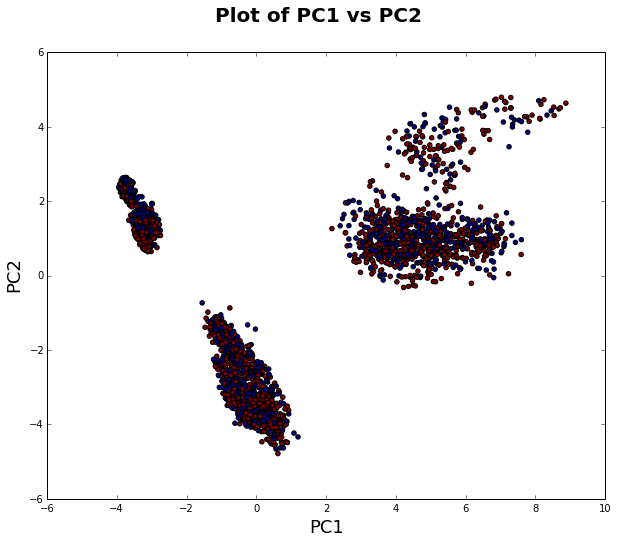

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=target) 
fig.suptitle('Plot of PC1 vs PC2', fontsize=20, fontweight='bold')
plt.xlabel('PC1', fontsize=18)
plt.ylabel('PC2', fontsize=18)

plt.show()

## Inference
- This is a high dimensional data (1776 features), therefore it is definitely not possible to visualize it.
- We calculate PCA and transform our data into lower dimensions such that it can capture maximum variance in the data. 
- After performinng PCA as above, we obtain data in 2 dimensions now it is easy to plot and visualze. 
- We see that the data is ___tightly___ grouped in 3 different clusters. __What more can be inferred with this?__


**Why do I think data visualization is important?**

Visualization should be the next step after we load and clean the data as it gives a rough idea about how the data looks like and what kind of classifier can be used to obtain best results.


### Forum posts on PCA:
1. http://blog.kaggle.com/2012/07/05/1st-place-interview-for-boehringer-ingelheim-biological-response/
2. https://www.kaggle.com/c/bioresponse/forums/t/1756/bizarre-difference-in-training-test-set


## Initialize K-Fold cross validation 

In [7]:
from sklearn import cross_validation
#Simple K-Fold cross validation. 5 folds.
cv = cross_validation.KFold(n = len(train), n_folds=5)

In [8]:
def crossValResults(classifierObj):
    results = []
    #iterate through the training and test cross validation segments and
    #run the classifier on each one, aggregating the results into a list
    for traincv, testcv in cv:
        probas = classifierObj.fit(train[traincv], target[traincv]).predict_proba(train[testcv])
        results.append(llfun( target[testcv], [x[1] for x in probas] ))
    return results

## Evaluation of classifiers using log loss metric with cross validation

### Random Forest
- Random Forest with default settings

In [9]:
from sklearn.ensemble import RandomForestClassifier
#In this case we'll use a random forest, but this could be any classifier
rfClassifier = RandomForestClassifier(n_estimators=100)

In [10]:
results = crossValResults(rfClassifier)
#print out the mean of the cross-validated results
print "Results(error): " + str( np.array(results).mean() )

Results(error): 0.45950696489


### SVM
- SVM with default settings

In [11]:
from sklearn import svm
svmClassifier = RandomForestClassifier(n_estimators=100)

In [12]:
results = crossValResults(svmClassifier)
#print out the mean of the cross-validated results
print "Results(error): " + str( np.array(results).mean() )

Results(error): 0.461494930034
